# Exploratory Data Analysis for Airbnb

The Airbnb data obtained is from Seattle in 2016. The purpose is to understand how the market behaves in 2016 to know what to expect. Also, learn the average price per property type, which property type has more demands through the year, identify any high and low seasons for the market, and see if I include the cleaning fee. Will this impact the booking demand? Answering this question will help us understand more the Airbnb market and know which area or property type will be more convenient.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/pedrorodriguez/Desktop/Springboard/Capstone_3/Step 4- Pre Processing/listing_data.csv')
dfc = pd.read_csv('/Users/pedrorodriguez/Desktop/Springboard/Capstone_3/Raw Data/Calendar_EDA.csv')
calendar = pd.read_csv('/Users/pedrorodriguez/Desktop/Springboard/Capstone_3/Raw Data/calendar.csv')
dfc2 = pd.read_csv('/Users/pedrorodriguez/Desktop/Springboard/Capstone_3/Raw Data/Calendar2_EDA.csv')

In [3]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1393570 non-null  int64  
 1   listing_id  1393570 non-null  int64  
 2   date        1393570 non-null  object 
 3   available   1393570 non-null  int64  
 4   price       1393570 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 53.2+ MB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3817 non-null   int64  
 1   id                         3817 non-null   int64  
 2   latitude                   3817 non-null   float64
 3   longitude                  3817 non-null   float64
 4   zipcode                    3817 non-null   int64  
 5   property_type              3817 non-null   object 
 6   room_type                  3817 non-null   object 
 7   price                      3817 non-null   float64
 8   accommodates               3817 non-null   int64  
 9   cleaning_fee               3817 non-null   float64
 10  availability_30            3817 non-null   int64  
 11  bathrooms                  3817 non-null   float64
 12  bedrooms                   3817 non-null   float64
 13  review_scores_rating       3817 non-null   float

## Have Airbnb high and low season, or is it consistent throughout the year? 

In [5]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [6]:
calendar['price'] = calendar['price'].str.replace('$', '').fillna(0)
calendar['price'] = calendar['price'].str.replace(',', '').astype(float)

In [7]:
cal_new = calendar.resample('W', on= 'date').price.mean().reset_index()

cal = px.line(cal_new, x= 'date', y= 'price', height=300, width=700)
cal.add_vline(x= '2016-01-18', line_width=2, line_dash="dash", line_color="red") #Martin Luther King
cal.add_vline(x= '2016-02-15', line_width=2, line_dash="dash", line_color="red") #President day
cal.add_vline(x= '2016-05-30', line_width=2, line_dash="dash", line_color="red") #Memorial Day
cal.add_vline(x= '2016-07-04', line_width=2, line_dash="dash", line_color="red") #Independence Day
cal.add_vline(x= '2016-09-05', line_width=2, line_dash="dash", line_color="red") #Labor Day
cal.add_vline(x= '2016-10-10', line_width=2, line_dash="dash", line_color="red") #Columbus Day
cal.add_vline(x= '2016-11-11', line_width=2, line_dash="dash", line_color="red") #Veterans Days
cal.add_vline(x= '2016-11-24', line_width=2, line_dash="dash", line_color="red") #Thanksgiving
cal.add_vline(x= '2016-12-25', line_width=2, line_dash="dash", line_color="red") #Christmas
cal.add_vline(x= '2017-01-01', line_width=2, line_dash="dash", line_color="red") #New Year

cal.update_layout(title='Average Booking Price in 2016', xaxis_range= ['2016-01-10', '2016-12-31'], xaxis_title= 'Date', yaxis_title= 'Booking per day price (USD)')
cal.show()


It seems like in 2016, the average price per booking start increasing in May and have a peak in July. Then, start decreasing in September until Thanksgiving.

In [8]:
dfc2.head()

Unnamed: 0      id        date  available  price property_type  \
0           0  241032  2016-04-01          1   85.0     Apartment   
1           1  241032  2016-05-01          1   85.0     Apartment   
2           2  241032  2016-06-01          0    0.0     Apartment   
3           3  241032  2016-07-01          0    0.0     Apartment   
4           4  241032  2016-08-01          0    0.0     Apartment   

   cleaning_fee  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [9]:
dfc2['date'] = pd.to_datetime(dfc2['date'])
dfc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393205 entries, 0 to 1393204
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Unnamed: 0     1393205 non-null  int64         
 1   id             1393205 non-null  int64         
 2   date           1393205 non-null  datetime64[ns]
 3   available      1393205 non-null  int64         
 4   price          1393205 non-null  float64       
 5   property_type  1393205 non-null  object        
 6   cleaning_fee   1393205 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 74.4+ MB


In [10]:
week = dfc2.resample('W', on= 'date').available.sum().reset_index()

In [11]:
day = dfc2.resample('D', on= 'date').available.sum().reset_index()

d= px.line(day, x= 'date', y= 'available', height=300, width=700)
d.update_layout(title='Daily Availability', xaxis_title= 'Date')
d.add_vline(x= '2016-01-01', line_width=2, line_dash="dash", line_color="red") #New Year
d.add_vline(x= '2016-01-18', line_width=2, line_dash="dash", line_color="red") #Martin Luther King
d.add_vline(x= '2016-02-15', line_width=2, line_dash="dash", line_color="red") #President day
d.add_vline(x= '2016-05-30', line_width=2, line_dash="dash", line_color="red") #Memorial Day
d.add_vline(x= '2016-07-04', line_width=2, line_dash="dash", line_color="red") #Independence Day
d.add_vline(x= '2016-09-05', line_width=2, line_dash="dash", line_color="red") #Labor Day
d.add_vline(x= '2016-10-10', line_width=2, line_dash="dash", line_color="red") #Columbus Day
d.add_vline(x= '2016-11-11', line_width=2, line_dash="dash", line_color="red") #Veterans Days
d.add_vline(x= '2016-11-24', line_width=2, line_dash="dash", line_color="red") #Thanksgiving
d.add_vline(x= '2016-12-25', line_width=2, line_dash="dash", line_color="red") #Christmas
d.add_vline(x= '2016-01-01', line_width=2, line_dash="dash", line_color="red") #New Year
d.show()

In [12]:

w = px.line(week, x= 'date', y= 'available', height=300, width=700)
w.update_layout(title='Weekly Availability',  xaxis_title= 'Date', yaxis_title= 'Average Available Units',xaxis_range= ['2016-01-10', '2016-12-31'])
w.add_vline(x= '2016-01-01', line_width=2, line_dash="dash", line_color="red") #New Year
w.add_vline(x= '2016-01-18', line_width=2, line_dash="dash", line_color="red") #Martin Luther King
w.add_vline(x= '2016-02-15', line_width=2, line_dash="dash", line_color="red") #President day
w.add_vline(x= '2016-05-30', line_width=2, line_dash="dash", line_color="red") #Memorial Day
w.add_vline(x= '2016-07-04', line_width=2, line_dash="dash", line_color="red") #Independence Day
w.add_vline(x= '2016-09-05', line_width=2, line_dash="dash", line_color="red") #Labor Day
w.add_vline(x= '2016-10-10', line_width=2, line_dash="dash", line_color="red") #Columbus Day
w.add_vline(x= '2016-11-11', line_width=2, line_dash="dash", line_color="red") #Veterans Days
w.add_vline(x= '2016-11-24', line_width=2, line_dash="dash", line_color="red") #Thanksgiving
w.add_vline(x= '2016-12-25', line_width=2, line_dash="dash", line_color="red") #Christmas
w.add_vline(x= '2016-01-01', line_width=2, line_dash="dash", line_color="red") #New Year
w.show()

Plotting the demand weekly, monthly, and quarterly seems that Airbnb is consistent throughout the entire year. It drops after 2017, but this could be happening for lack of 2017 data. 

## Comparing Property types prices

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3817 non-null   int64  
 1   id                         3817 non-null   int64  
 2   latitude                   3817 non-null   float64
 3   longitude                  3817 non-null   float64
 4   zipcode                    3817 non-null   int64  
 5   property_type              3817 non-null   object 
 6   room_type                  3817 non-null   object 
 7   price                      3817 non-null   float64
 8   accommodates               3817 non-null   int64  
 9   cleaning_fee               3817 non-null   float64
 10  availability_30            3817 non-null   int64  
 11  bathrooms                  3817 non-null   float64
 12  bedrooms                   3817 non-null   float64
 13  review_scores_rating       3817 non-null   float

In [14]:
df.describe()

Unnamed: 0            id     latitude    longitude       zipcode  \
count  3817.000000  3.817000e+03  3817.000000  3817.000000   3817.000000   
mean   1908.427823  5.551565e+06    47.628987  -122.333118  97935.761331   
std    1102.441391  2.961687e+06     0.043028     0.031735   4198.441215   
min       0.000000  4.291000e+03    47.505088  -122.417219      0.000000   
25%     954.000000  3.258386e+06    47.609418  -122.354328  98104.000000   
50%    1908.000000  6.118291e+06    47.623604  -122.328886  98112.000000   
75%    2863.000000  8.035212e+06    47.662701  -122.310803  98121.000000   
max    3817.000000  1.034016e+07    47.733358  -122.240607  98199.000000   

             price  accommodates  cleaning_fee  availability_30    bathrooms  \
count  3817.000000   3817.000000   3817.000000      3817.000000  3817.000000   
mean    127.978255      3.349227     45.055017        16.790673     1.254257   
std      90.261754      1.977830     49.917984        12.172198     0.594787   
min      20.000000      1.000000      0.000000         0.000000     0.000000   
25%      75.000000      2.000000      0.000000         2.000000     1.000000   
50%     100.000000      3.000000     30.000000        20.000000     1.000000   
75%     150.000000      4.000000     65.000000        30.000000     1.000000   
max    1000.000000     16.000000    300.000000        30.000000     8.000000   

          bedrooms  review_scores_rating  review_scores_cleanliness  
count  3817.000000           3817.000000                3817.000000  
mean      1.305476             78.539167                   7.924024  
std       0.884264             35.961313                   3.669523  
min       0.000000              0.000000                   0.000000  
25%       1.000000             87.000000                   9.000000  
50%       1.000000             95.000000                  10.000000  
75%       2.000000             98.000000                  10.000000  
max       7.000000            100.000000                  10.000000

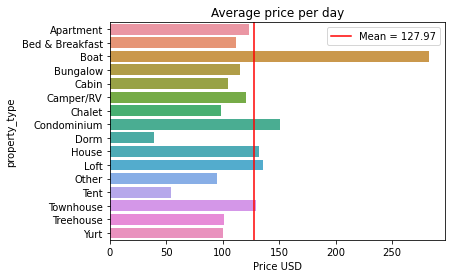

In [15]:
df_type = df.groupby('property_type').price.mean().reset_index()

sns.barplot(data= df_type, x= 'price', y='property_type')
plt.axvline(x=127.97, color='red',label='Mean = 127.97')
plt.title('Average price per day')
plt.xlabel('Price USD')
plt.legend()

In [16]:
pie = px.pie(df_type, values='price', names='property_type', color_discrete_sequence=px.colors.sequential.RdBu)
pie.show()

The bar plot shows the boats are the most expensive compared to the rest of the properties. The price average is $127.97 per booking. I'm interested to see how the average change if we take off the boat property.  

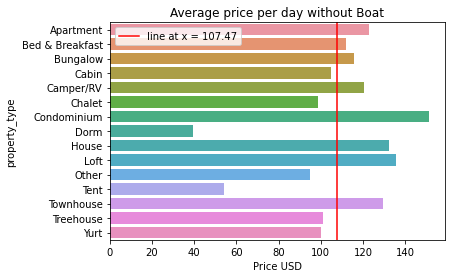

In [17]:
df_type2 = df_type[df_type['property_type'] != 'Boat']

sns.barplot(data= df_type2, x= 'price', y='property_type')
plt.axvline(x=df_type2['price'].mean(), color='red',label='line at x = {}'.format(round(df_type2['price'].mean(), 2)))
plt.title('Average price per day without Boat')
plt.xlabel('Price USD')
plt.legend()

In [18]:
pie2 = px.pie(df_type2, values='price', names='property_type', color_discrete_sequence=px.colors.sequential.RdBu)
pie2.update_traces(textposition='inside', textinfo='percent+label')
pie2.show()

In [19]:
df_type2.groupby('property_type').price.mean().sort_values(ascending= False)

property_type
Condominium        151.109890
Loft               135.700000
House              132.351414
Townhouse          129.457627
Apartment          122.932670
Camper/RV          120.461538
Bungalow           115.615385
Bed & Breakfast    112.054054
Cabin              104.666667
Treehouse          101.000000
Yurt               100.000000
Chalet              98.500000
Other               94.681818
Tent                54.000000
Dorm                39.500000
Name: price, dtype: float64

After taking off the boar property, the price average decrease by $20.30 per booking, and now the Condominium has the highest booking price. The dorm and tent are the lowest prices per booking.

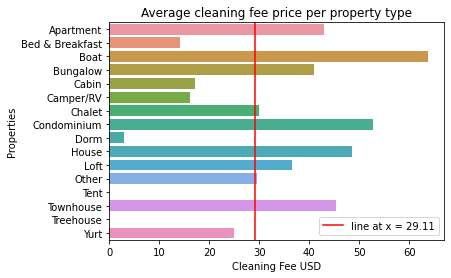

In [20]:
dfc2_c = dfc2.groupby(by= ['date', 'property_type']).cleaning_fee.mean().reset_index()
#plt.figure(figsize=(16,10))
plt.title('Average cleaning fee price per property type')
sns.barplot(data=dfc2_c, x='cleaning_fee', y= 'property_type')
plt.axvline(x=dfc2_c['cleaning_fee'].mean(), color='red',label='line at x = {}'.format(round(dfc2_c['cleaning_fee'].mean(), 2)))
plt.ylabel('Properties')
plt.xlabel('Cleaning Fee USD')
plt.legend()

The average cleaning fee per booking is 29.11 dollars. The boats are the highest price again,  let's see how the average change without the boats. 

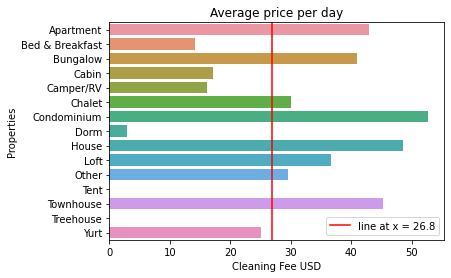

In [21]:
dfc2_c2 = dfc2_c[dfc2_c['property_type'] != 'Boat']

sns.barplot(data= dfc2_c2, x= 'cleaning_fee', y='property_type')
plt.axvline(x=dfc2_c2['cleaning_fee'].mean(), color='red',label='line at x = {}'.format(round(dfc2_c2['cleaning_fee'].mean(), 2)))
plt.title('Average price per day')
plt.xlabel('Cleaning Fee USD')
plt.ylabel('Properties')
plt.legend()

Taking off the boat's properties, the average decrease by 3 dollars, indicating the Cleaning fee price is averaging 26.80 dollars per booking. 

In [22]:
dfc2.groupby('property_type').cleaning_fee.mean().sort_values(ascending= False)

property_type
Boat               63.750000
Condominium        52.692308
House              48.515868
Townhouse          45.288136
Apartment          42.984192
Bungalow           40.923077
Loft               36.575000
Chalet             30.000000
Other              29.545455
Yurt               25.000000
Cabin              17.142857
Camper/RV          16.153846
Bed & Breakfast    14.189189
Dorm                3.000000
Treehouse           0.000000
Tent                0.000000
Name: cleaning_fee, dtype: float64

## Let's move on to see how is the demand per property type in 2016.

In [23]:
dfc2['date'] = pd.to_datetime(dfc2['date'])
dfc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393205 entries, 0 to 1393204
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Unnamed: 0     1393205 non-null  int64         
 1   id             1393205 non-null  int64         
 2   date           1393205 non-null  datetime64[ns]
 3   available      1393205 non-null  int64         
 4   price          1393205 non-null  float64       
 5   property_type  1393205 non-null  object        
 6   cleaning_fee   1393205 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 74.4+ MB


In [24]:
dfc2_g = dfc2.groupby(by= ['date', 'property_type']).price.sum().reset_index()
fig = px.line(dfc2_g, x='date', y= 'price', color='property_type', height=500, width=950)
fig.update_layout(title= 'Total earning per property type', yaxis_title= 'Total booking per day ($)', xaxis_title= 'Date' )

fig.add_vline(x= '2016-01-01', line_width=2, line_dash="dash", line_color="red") #New Year
fig.add_vline(x= '2016-01-18', line_width=2, line_dash="dash", line_color="red") #Martin Luther King
fig.add_vline(x= '2016-02-15', line_width=2, line_dash="dash", line_color="red") #President day
fig.add_vline(x= '2016-05-30', line_width=2, line_dash="dash", line_color="red") #Memorial Day
fig.add_vline(x= '2016-07-04', line_width=2, line_dash="dash", line_color="red") #Independence Day
fig.add_vline(x= '2016-09-05', line_width=2, line_dash="dash", line_color="red") #Labor Day
fig.add_vline(x= '2016-10-10', line_width=2, line_dash="dash", line_color="red") #Columbus Day
fig.add_vline(x= '2016-11-11', line_width=2, line_dash="dash", line_color="red") #Veterans Days
fig.add_vline(x= '2016-11-24', line_width=2, line_dash="dash", line_color="red") #Thanksgiving
fig.add_vline(x= '2016-12-25', line_width=2, line_dash="dash", line_color="red") #Christmas
fig.show()

In [25]:
dfc2_a = dfc2.groupby(by= ['date', 'property_type']).available.sum().reset_index()
fig2 = px.line(dfc2_a, x='date', y= 'available', color='property_type', height=500, width=950)
fig2.update_layout(title= 'Total Demand per property type', yaxis_title= 'Total demand per day', xaxis_title= 'Date' )


fig2.add_vline(x= '2016-01-18', line_width=2, line_dash="dash", line_color="red") #Martin Luther King
fig2.add_vline(x= '2016-02-15', line_width=2, line_dash="dash", line_color="red") #President day
fig2.add_vline(x= '2016-05-30', line_width=2, line_dash="dash", line_color="red") #Memorial Day
fig2.add_vline(x= '2016-07-04', line_width=2, line_dash="dash", line_color="red") #Independence Day
fig2.add_vline(x= '2016-09-05', line_width=2, line_dash="dash", line_color="red") #Labor Day
fig2.add_vline(x= '2016-10-10', line_width=2, line_dash="dash", line_color="red") #Columbus Day
fig2.add_vline(x= '2016-11-11', line_width=2, line_dash="dash", line_color="red") #Veterans Days
fig2.add_vline(x= '2016-11-24', line_width=2, line_dash="dash", line_color="red") #Thanksgiving
fig2.add_vline(x= '2016-12-25', line_width=2, line_dash="dash", line_color="red") #Christmas

fig2.show()


In [26]:
pie4 = px.pie(dfc2_a, values='available', names='property_type', color_discrete_sequence=px.colors.sequential.RdBu)
pie4.update_layout(title= 'Property type' )
pie4.update_traces(textposition='inside', textinfo='percent+label')
pie4.show()

The line plot seems like the houses, and the apartments were the most used and most earning in 2016. The rest of the properties don't pass $25,000 in revenue in the entire year. It also seems a trend where the gains and the bookings drop every first of each month. 
It is more convenient to have a house and an Apartment to put on the Airbnb market. 

Now we know the Apartments and houses are the most demanded throughout the entire 2016. The house's booking price is on average 132.35 USD with 48.51 USD of a cleaning fee, and the apartment has an average cost of 112.93 USD per booking and 42.98 USD of a cleaning fee.

## Studing the different Seattles location

In [27]:
df_zipcode_price = df.groupby(by= ['zipcode']).price.mean().reset_index().sort_values(by= 'price', ascending= False)
print(df_zipcode_price)

    zipcode       price
21    98134  206.600000
27    98199  172.393939
1     98101  166.721393
15    98119  166.377622
0         0  161.285714
16    98121  153.785714
9     98109  150.247525
12    98116  145.348214
22    98136  137.909091
10    98112  135.437126
4     98104  135.221053
17    98122  132.337292
7     98107  130.238889
2     98102  127.103245
3     98103  124.149746
19    98126  122.730159
11    98115  112.129213
13    98117  111.262195
5     98105  107.111111
23    98144  105.395000
25    98177   98.842105
24    98146   97.800000
26    98178   94.428571
14    98118   93.627451
18    98125   88.577465
20    98133   86.282609
8     98108   83.875000
6     98106   82.103448


In [28]:
df_zipcode_ava = df.groupby(by= ['zipcode']).availability_30.mean().reset_index().sort_values(by= 'availability_30', ascending= False)
print(df_zipcode_ava)


    zipcode  availability_30
26    98178        25.428571
21    98134        24.000000
27    98199        22.242424
18    98125        19.295775
19    98126        19.190476
0         0        18.571429
6     98106        18.551724
5     98105        18.342222
4     98104        18.147368
14    98118        17.967320
16    98121        17.928571
1     98101        17.880597
12    98116        17.696429
13    98117        17.347561
24    98146        17.000000
10    98112        16.964072
8     98108        16.785714
23    98144        16.515000
3     98103        16.512690
20    98133        16.369565
7     98107        16.305556
17    98122        16.099762
22    98136        15.590909
11    98115        15.589888
15    98119        15.139860
2     98102        14.988201
9     98109        14.440594
25    98177        13.000000


It is interesting to calculate the average price per booking. The **zip code 98134** has the highest average booking price per day with **206.60 USD** and is the **second most available zone** with 24 days available per month. The **zip code 98177** is the busiest, and the average booking price per day is **98.84 USD**. These findings could mean that Airbnb customers preferred to stay in cheaper parts than expensive units. 

# Studying correlations between features

Now that we know the most profitable through the year are apartments and houses. So, let's see the correlation between features and then focus on apartments and house properties to understand how the cleaning fee influences the monthly availability and the booking price per day.

In [29]:
df['zipcode'] = df['zipcode'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3817 non-null   int64  
 1   id                         3817 non-null   int64  
 2   latitude                   3817 non-null   float64
 3   longitude                  3817 non-null   float64
 4   zipcode                    3817 non-null   object 
 5   property_type              3817 non-null   object 
 6   room_type                  3817 non-null   object 
 7   price                      3817 non-null   float64
 8   accommodates               3817 non-null   int64  
 9   cleaning_fee               3817 non-null   float64
 10  availability_30            3817 non-null   int64  
 11  bathrooms                  3817 non-null   float64
 12  bedrooms                   3817 non-null   float64
 13  review_scores_rating       3817 non-null   float

In [30]:
location = df[df['zipcode'] == 98134].groupby(by= ['latitude', 'longitude']).price.max().reset_index().sort_values(by= 'price', ascending= False)
location.head(2)

latitude   longitude  price
1  47.577590 -122.319566  320.0
2  47.580007 -122.326628  265.0

In [31]:
#I'm calculating the distance from the unit with the highest average price per day from the rest of the unit in miles as distance
#def distance(x, y):
#    return (distance.distance(x, y).miles)

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    All args must be of equal length.  
    Code reference: https://gist.github.com/susanli2016/57f37514fbc491e287c300616104fe77  
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = np.absolute(lon2 - lon1)
    dlat = np.absolute(lat2 - lat1)

    a = (np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2)
    c = (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))

    km = (6371 * c)  # 6371 is Radius of earth in kilometers. Use 3956 for miles
    return km

df['distance'] = \
                haversine_np(df.latitude.shift(1), df.longitude.shift(1),
                47.6019, -122.3319) # Downtown Coordinates 


In [32]:
df['distance'] = df['distance'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3817 non-null   int64  
 1   id                         3817 non-null   int64  
 2   latitude                   3817 non-null   float64
 3   longitude                  3817 non-null   float64
 4   zipcode                    3817 non-null   object 
 5   property_type              3817 non-null   object 
 6   room_type                  3817 non-null   object 
 7   price                      3817 non-null   float64
 8   accommodates               3817 non-null   int64  
 9   cleaning_fee               3817 non-null   float64
 10  availability_30            3817 non-null   int64  
 11  bathrooms                  3817 non-null   float64
 12  bedrooms                   3817 non-null   float64
 13  review_scores_rating       3817 non-null   float

In [33]:
# I'm going to create a additional cleaning fee with 0 meaning no cleaning fee and 1 as having cleaning dee
df['cleaning_fee_class'] = np.where(df['cleaning_fee'] != 0, 1, 0)

In [34]:
df.corr()

Unnamed: 0        id  latitude  longitude  \
Unnamed: 0                   1.000000  0.010412  0.047241   0.079536   
id                           0.010412  1.000000 -0.017292   0.014258   
latitude                     0.047241 -0.017292  1.000000  -0.154176   
longitude                    0.079536  0.014258 -0.154176   1.000000   
price                       -0.076729 -0.046354 -0.008964  -0.102422   
accommodates                -0.083204 -0.074153  0.000534  -0.071772   
cleaning_fee                -0.102759 -0.122490  0.003644  -0.079301   
availability_30              0.013818 -0.068792 -0.020603  -0.006584   
bathrooms                   -0.036624 -0.045407 -0.019112  -0.017283   
bedrooms                    -0.044459 -0.060174  0.040685  -0.054864   
review_scores_rating        -0.021233 -0.388079 -0.021161   0.009934   
review_scores_cleanliness   -0.024570 -0.381557 -0.024986   0.004507   
distance                     0.135810 -0.018732  0.190753  -0.202305   
cleaning_fee_class          -0.086381 -0.109745 -0.010349  -0.016067   

                              price  accommodates  cleaning_fee  \
Unnamed: 0                -0.076729     -0.083204     -0.102759   
id                        -0.046354     -0.074153     -0.122490   
latitude                  -0.008964      0.000534      0.003644   
longitude                 -0.102422     -0.071772     -0.079301   
price                      1.000000      0.652235      0.576465   
accommodates               0.652235      1.000000      0.630575   
cleaning_fee               0.576465      0.630575      1.000000   
availability_30           -0.037694     -0.043061      0.036053   
bathrooms                  0.512136      0.533643      0.444351   
bedrooms                   0.626960      0.769686      0.561936   
review_scores_rating      -0.020001      0.036860      0.056303   
review_scores_cleanliness -0.017049      0.042725      0.070936   
distance                  -0.087213      0.043415     -0.027003   
cleaning_fee_class         0.161897      0.246735      0.548774   

                           availability_30  bathrooms  bedrooms  \
Unnamed: 0                        0.013818  -0.036624 -0.044459   
id                               -0.068792  -0.045407 -0.060174   
latitude                         -0.020603  -0.019112  0.040685   
longitude                        -0.006584  -0.017283 -0.054864   
price                            -0.037694   0.512136  0.626960   
accommodates                     -0.043061   0.533643  0.769686   
cleaning_fee                      0.036053   0.444351  0.561936   
availability_30                   1.000000  -0.044697 -0.077908   
bathrooms                        -0.044697   1.000000  0.606140   
bedrooms                         -0.077908   0.606140  1.000000   
review_scores_rating              0.023785   0.007244 -0.009581   
review_scores_cleanliness         0.033748   0.004531 -0.012955   
distance                          0.039928   0.041092  0.149958   
cleaning_fee_class                0.020048   0.099627  0.155968   

                           review_scores_rating  review_scores_cleanliness  \
Unnamed: 0                            -0.021233                  -0.024570   
id                                    -0.388079                  -0.381557   
latitude                              -0.021161                  -0.024986   
longitude                              0.009934                   0.004507   
price                                 -0.020001                  -0.017049   
accommodates                           0.036860                   0.042725   
cleaning_fee                           0.056303                   0.070936   
availability_30                        0.023785                   0.033748   
bathrooms                              0.007244                   0.004531   
bedrooms                              -0.009581                  -0.012955   
review_scores_rating                   1.000000                   0.982421  

In [35]:
dfhm = df
dfhm = dfhm.drop(columns= ['Unnamed: 0', 'id', 'review_scores_rating', 'review_scores_cleanliness', 'latitude', 'longitude'])



hm = px.imshow(dfhm.corr())
hm.update_layout(title= 'Heatmap')
hm.show()

The heatmap shows the strongest correlation between the accommodation and price with 65%, then accommodation and cleaning fee with 63%. We have a cleaning fee and booking price with a 57% probability, but this correlation is moderate. The regression plot exhibits the highest booking price per day the highest cleaning fee per booking can be. But, still, the correlation is mild, meaning not always is the case. 

In [36]:
reg = px.scatter(df, x= 'cleaning_fee', y= 'price', trendline= "ols")
reg.update_layout(title= 'Cleaning Fee vs Price', yaxis_title= 'Booking Price per day (USD)', xaxis_title= 'Cleaning Fee per Booking (USD)')
reg.show()

In [37]:
reg2 = px.scatter(df, x= 'cleaning_fee', y= 'accommodates', trendline= "ols")
reg2.update_layout(title= 'Cleaning fee vs Accommodation', yaxis_title= 'Cleaning Fee per Booking (USD)', xaxis_title= 'Accommodation')
reg2.show()

In [38]:
reg3 = px.scatter(df, x= 'cleaning_fee', y= 'availability_30', trendline= "ols")
reg3.update_layout(title= 'Cleaning Fee vs Availability', yaxis_title= 'Accommodation', xaxis_title= 'Cleaning Fee per Booking (USD)')
reg3.show()

In [39]:
reg4 = px.scatter(df, x= 'availability_30', y= 'distance', trendline= "ols")
reg4.update_layout(title= 'Distance vs Availability', xaxis_title= 'Monthly Availability', yaxis_title= 'Distance (km)')

In [40]:
reg5= px.scatter(df, x= 'price', y= 'distance', trendline= "ols")
reg5.update_layout(title= 'Distance vs Booking Price per day', xaxis_title= 'Booking Price per day (USD)', yaxis_title= 'Distance (km)')

The regression analysis between distance and monthly availability does not correlate with an R squared of 0.0015. Between distance and booking price per day seems like most units under 200 USD are close to Downtown, and the most expensive are far from it. 

# Apartment and House properties

In [41]:
apho = df[df['property_type'].isin(['House', 'Apartment'])]
apho['property_type'].unique()

array(['Apartment', 'House'], dtype=object)

In [42]:
apho['distance'] = apho['distance'].fillna(0)

<ipython-input-42-b7bd0e73c707>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
apho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3441 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3441 non-null   int64  
 1   id                         3441 non-null   int64  
 2   latitude                   3441 non-null   float64
 3   longitude                  3441 non-null   float64
 4   zipcode                    3441 non-null   object 
 5   property_type              3441 non-null   object 
 6   room_type                  3441 non-null   object 
 7   price                      3441 non-null   float64
 8   accommodates               3441 non-null   int64  
 9   cleaning_fee               3441 non-null   float64
 10  availability_30            3441 non-null   int64  
 11  bathrooms                  3441 non-null   float64
 12  bedrooms                   3441 non-null   float64
 13  review_scores_rating       3441 non-null   float

In [44]:
apho.to_csv('/Users/pedrorodriguez/Desktop/Springboard/Capstone_3/Raw Data/apartment&house_data.csv')

In [45]:
apho = apho.drop(columns= ['Unnamed: 0', 'id', 'review_scores_rating', 'review_scores_cleanliness', 'latitude', 'longitude'])

aphohm = px.imshow(apho.corr())
aphohm.update_layout(title= 'Heatmap')
aphohm.show()

In [46]:
apho_reg = px.scatter(apho, x= 'cleaning_fee', y= 'price', trendline= "ols")
apho_reg.update_layout(title= 'Apartment and House - Cleaning fee vs Price')
apho_reg.show()

In [47]:
apho_zipcode = apho[apho['zipcode'] != 0]

apho_reg2 = px.scatter(apho_zipcode, x= 'zipcode', y= 'price', trendline= "ols")
apho_reg2.update_layout(title= 'Apartment and House - Zip Code vs Price')
apho_reg2.show()

In [48]:
apho_reg3 = px.scatter(apho, x= 'cleaning_fee', y= 'availability_30', trendline= "ols")
apho_reg3.update_layout(title= 'Apartment and House - Cleaning fee vs Monthly Availability')
apho_reg3.show()

In [49]:
apho = apho[apho['zipcode'] !=0]
px.scatter(apho, x= 'zipcode', y= 'availability_30', trendline= "ols")

In [50]:
apho_reg4 = px.scatter(apho, x= 'availability_30', y= 'distance', trendline= "ols")
apho_reg4.update_layout(title= 'Distance vs Monthly Availability',
                        xaxis_title= 'Monthly Availability', yaxis_title= 'Distance (km)')
apho_reg4.show()

In [51]:
apho_reg5 = px.scatter(apho, x= 'price', y= 'distance', trendline= "ols")
apho_reg5.update_layout(title= 'Distance vs Booking price per day',
                        xaxis_title= 'Booking price per day', yaxis_title= 'Distance (km)')
apho_reg5.show()

## Apartment Property

In [52]:
apartment = df[df['property_type'] == 'Apartment']
del apartment['property_type']
apartment.head(2)

Unnamed: 0      id   latitude   longitude zipcode        room_type  price  \
0           0  241032  47.636289 -122.371025   98119  Entire home/apt   85.0   
1           1  953595  47.639123 -122.365666   98119  Entire home/apt  150.0   

   accommodates  cleaning_fee  availability_30  bathrooms  bedrooms  \
0             4           0.0               14        1.0       1.0   
1             4          40.0               13        1.0       1.0   

   review_scores_rating  review_scores_cleanliness  distance  \
0                  95.0                       10.0  0.000000   
1                  96.0                       10.0  4.807703   

   cleaning_fee_class  
0                   0  
1                   1

In [53]:
apartment = apartment.drop(columns= ['Unnamed: 0', 'latitude', 'longitude', 'id', 'review_scores_rating', 'review_scores_cleanliness'])
apartment.corr()

price  accommodates  cleaning_fee  availability_30  \
price               1.000000      0.460230      0.431814         0.085598   
accommodates        0.460230      1.000000      0.512112         0.129822   
cleaning_fee        0.431814      0.512112      1.000000         0.173199   
availability_30     0.085598      0.129822      0.173199         1.000000   
bathrooms           0.397670      0.440359      0.310892         0.086997   
bedrooms            0.377397      0.583068      0.357668         0.096111   
distance           -0.222357     -0.061818     -0.105861         0.016357   
cleaning_fee_class  0.129377      0.228814      0.611976         0.097005   

                    bathrooms  bedrooms  distance  cleaning_fee_class  
price                0.397670  0.377397 -0.222357            0.129377  
accommodates         0.440359  0.583068 -0.061818            0.228814  
cleaning_fee         0.310892  0.357668 -0.105861            0.611976  
availability_30      0.086997  0.096111  0.016357            0.097005  
bathrooms            1.000000  0.447904 -0.105706            0.080904  
bedrooms             0.447904  1.000000  0.055665            0.085472  
distance            -0.105706  0.055665  1.000000           -0.075578  
cleaning_fee_class   0.080904  0.085472 -0.075578            1.000000

In [54]:
hm2 = px.imshow(apartment.corr())
hm2.update_layout(title= 'Apartment Heatmap')
hm2.show()

In [55]:
fig3 = px.scatter(apartment, x= 'cleaning_fee', y= 'price', trendline="ols")
fig3.update_layout(title= 'Apartment price vs Apartment Cleaning Fee', yaxis_title= 'Booking Price per day', xaxis_title= 'Cleaning Fee per Booking')
fig3.show()

In [56]:
fig4 = px.scatter(apartment, x= 'cleaning_fee', y= 'availability_30', trendline="ols")
fig4.update_layout(title= 'Apartment booking per day vs Apartment Cleaning Fee', yaxis_title= 'Booking per day', xaxis_title= 'Cleaning Fee per Booking')
fig4.show()

In [57]:
reg4 = px.scatter(apartment, x= 'price', y= 'accommodates', trendline= "ols")
reg4.update_layout(title= 'Price vs Accommodation', yaxis_title= 'Accommodation', xaxis_title= 'Booking Price per day')
reg4.show()

In [58]:
apartment = apartment[apartment['zipcode'] != 0]

reg5 = px.scatter(apartment, x= 'zipcode', y= 'price', trendline= "ols")
reg5.update_layout(title= 'Booking price per day vs Zip Code', yaxis_title= 'Booking price per day', xaxis_title= 'Zip Code')
reg5.show()

In [59]:
reg6 = px.scatter(apartment, x= 'cleaning_fee', y= 'accommodates', trendline= "ols")
reg6.update_layout(title= 'Cleaning Fee vs Accommodation', yaxis_title= 'Accommodation', xaxis_title= 'Cleaning Fee per Booking')
reg6.show()

Studying the apartment property correlations, I found the cleaning fee does not significantly affect any feature. The highest correlation is with booking cost per day with a 0.43, which is a weak correlation.

### House Property

In [60]:
house = df[df['property_type'] == 'House']
del house['property_type']
house.head(2)

Unnamed: 0       id   latitude   longitude zipcode        room_type  price  \
2           2  3308979  47.629724 -122.369483   98119  Entire home/apt  975.0   
4           4   278830  47.632918 -122.372471   98119  Entire home/apt  450.0   

   accommodates  cleaning_fee  availability_30  bathrooms  bedrooms  \
2            11         300.0                1        4.5       5.0   
4             6         125.0               30        2.0       3.0   

   review_scores_rating  review_scores_cleanliness  distance  \
2                  97.0                       10.0  4.359157   
4                  92.0                        9.0  4.691575   

   cleaning_fee_class  
2                   1  
4                   1

In [61]:
house = house.drop(columns= ['Unnamed: 0', 'id', 'latitude', 'longitude', 'review_scores_rating', 'review_scores_cleanliness'])
house.corr()

price  accommodates  cleaning_fee  availability_30  \
price               1.000000      0.731678      0.644213        -0.129965   
accommodates        0.731678      1.000000      0.689671        -0.148138   
cleaning_fee        0.644213      0.689671      1.000000        -0.069446   
availability_30    -0.129965     -0.148138     -0.069446         1.000000   
bathrooms           0.595863      0.589722      0.551580        -0.143188   
bedrooms            0.763973      0.853198      0.682652        -0.207591   
distance           -0.051241      0.036872     -0.009708         0.038961   
cleaning_fee_class  0.197959      0.270249      0.513580        -0.060980   

                    bathrooms  bedrooms  distance  cleaning_fee_class  
price                0.595863  0.763973 -0.051241            0.197959  
accommodates         0.589722  0.853198  0.036872            0.270249  
cleaning_fee         0.551580  0.682652 -0.009708            0.513580  
availability_30     -0.143188 -0.207591  0.038961           -0.060980  
bathrooms            1.000000  0.658295 -0.066082            0.143594  
bedrooms             0.658295  1.000000  0.011353            0.223219  
distance            -0.066082  0.011353  1.000000           -0.064164  
cleaning_fee_class   0.143594  0.223219 -0.064164            1.000000

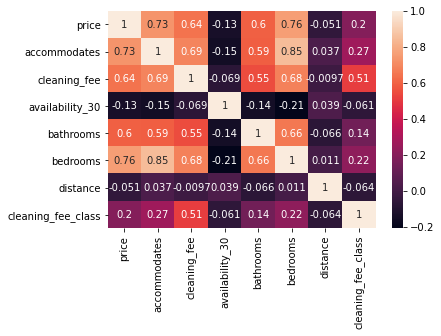

In [62]:
sns.heatmap(house.corr(), annot=True)

In [63]:
fig5 = px.scatter(house, x= 'cleaning_fee', y= 'availability_30', trendline="ols")
fig5.update_layout(title= 'Houses booking per day vs Houses Cleaning Fee', yaxis_title= 'Booking per day', xaxis_title= 'Cleaning Fee per Booking')
fig5.show()

In [64]:
fig6 = px.scatter(house, x= 'cleaning_fee', y= 'price', trendline="ols")
fig6.update_layout(title= 'Houses booking price per day vs Houses Cleaning Fee', yaxis_title= 'Booking price per day', xaxis_title= 'Cleaning Fee per Booking')
fig6.show()

In [65]:
reg6 = px.scatter(house, x= 'price', y= 'accommodates', trendline= "ols")
reg6.update_layout(title= 'Price vs Accommodation', yaxis_title= 'Accommodation', xaxis_title= 'Booking Price per day')
reg6.show()

In [66]:
reg7 = px.scatter(house, x= 'cleaning_fee', y= 'accommodates', trendline= "ols")
reg7.update_layout(title= 'Cleaning Fee vs Accommodation', yaxis_title= 'Accommodation', xaxis_title= 'Cleaning Fee per Booking')
reg7.show()

In [67]:
house2 = pd.read_csv('/Users/pedrorodriguez/Desktop/Springboard/Capstone_3/Raw Data/house.csv')
z= px.scatter(house, x= 'distance', y= 'price', trendline= 'ols')
z.update_layout(title= 'Price vs Distance', yaxis_title= 'Price USD', xaxis_title= 'Distance')
z.show()

In [68]:
x= px.scatter(house, x= 'distance', y= 'availability_30', trendline= 'ols')
x.update_layout(title= 'Availability vs Distance', yaxis_title= 'Monthly Availability', xaxis_title= 'Distance')
x.show()

In [69]:
px.scatter(house, x= 'price', y= 'availability_30', trendline= 'ols')

In [70]:
house = house[house['zipcode'] != 0]
px.scatter(house, x= 'price', y= 'zipcode', trendline= 'ols')

In [71]:
px.scatter(house, x= 'availability_30', y= 'zipcode', trendline= 'ols')

Studying the house's property correlations, I found the accommodation and the price are more substantial than the apartment with 73%. The cleaning fee and accommodation have a 68% of correlation, which is a moderate correlation. The regression plot between cleaning fee and booking price per day shows a trend indicating the highest the booking price is, the highest the cleaning fee is. Still, again, this is a moderate correlation, meaning is not always the case. 

In [72]:
df= df.drop(columns= {'Unnamed: 0', 'id', 'latitude', 'longitude'})
c = df.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort").reset_index()
so = so.rename(columns= {0: 'All Property Type'})
so = so[so['level_0'] == 'price']

In [73]:
c2 = apho.corr()
s2 = c2.unstack()
so2 = s2.sort_values(kind="quicksort").reset_index()
so2 = so2.rename(columns= {0: 'Apartment & House'})
so2 = so2[so2['level_0'] == 'price']

In [74]:
c3 = apartment.corr()
s3 = c3.unstack()
so3 = s3.sort_values(kind="quicksort").reset_index()
so3 = so3.rename(columns= {0: 'Apartment'})
so3 = so3[so3['level_0'] == 'price']

In [75]:
c4 = house.corr()
s4 = c4.unstack()
so4 = s4.sort_values(kind="quicksort").reset_index()
so4 = so4.rename(columns= {0: 'House'})
so4 = so4[so4['level_0'] == 'price']

In [76]:
table_1 = pd.merge(so, so2)
table_2 = pd.merge(table_1, so3)
table_3 = pd.merge(table_2, so4)
table_3 = table_3.drop(columns= {'level_0'})
table_3 = table_3.rename(columns= {'level_1' : 'Features (Corr with Price)'})
table_3.head(10)

Features (Corr with Price)  All Property Type  Apartment & House  Apartment  \
0                   distance          -0.087213          -0.078114  -0.223090   
1            availability_30          -0.037694          -0.046965   0.085683   
2         cleaning_fee_class           0.161897           0.166345   0.129495   
3                  bathrooms           0.512136           0.540761   0.397576   
4               cleaning_fee           0.576465           0.577996   0.431815   
5                   bedrooms           0.626960           0.639400   0.376921   
6               accommodates           0.652235           0.659077   0.460235   
7                      price           1.000000           1.000000   1.000000   

      House  
0 -0.050246  
1 -0.131274  
2  0.196728  
3  0.595028  
4  0.643880  
5  0.763073  
6  0.730983  
7  1.000000

# Summary 

In this EDA, the investigation shows the property type most demanded through 2016 are Apartments and Houses. The average booking price per day for an Apartment is 122.93 USD and for a house is 132.35 USD. The summer is the season where all hosts raise the booking price per day. 

The study shows the Airbnb units in zipcode 98134 have an average of 206 USD booking price per day, being the most expensive of all locations. The monthly availability is the second highest, meaning people are not looking to stay in this area. 

Before studying the correlations between features, I use the coordinates of the Seattle downtown and calculate the distance between the rest of the units' locations to see if there is any pattern. Then I created a new classification column as cleaning fee class showing if the units have a cleaning fee or not.  

The correlation analysis shows the cleaning fee is not correlated with the monthly availability meaning the people don't consider the cleaning fee to make the booking. The booking prices are strongly correlated with accommodation, bedrooms, cleaning fees, and bathrooms. 